<a href="https://colab.research.google.com/github/LeonardoCamargoRossato/MetCompB/blob/main/Metodo_Euler__Resolucao_Trabalho_%2B_Aula_Bonus_1/Resolu%C3%A7%C3%A3o_Trabalho1_Lan%C3%A7amentoProjetil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UFRGS - FIS01206 - Métodos Computacionais da Fisica B

### Trabalho 1: Lançamento Projétil usando Método de Euler

In [1]:
#Import de bibliotecas usadas no trabalho
from math import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Função para transformar Graus em Radianos
def rad(graus):
    return graus*pi/180

#Ou simplesmente usando biblioteca math
theta_em_graus = 30
theta_radianos = radians(theta_em_graus)

#Comparando as duas formas:
print('Função criada "rad"   = ', rad(30))
print('Função math "radians" = ', radians(30))

Função criada "rad"   =  0.5235987755982988
Função math "radians" =  0.5235987755982988


### Definindo Função:   SEM Atrito - Método Euler

In [3]:
def euler_sem_atrito(np,dt,v0,angulo):

    # Input de dados (Condições Iniciais):
    g = 10; alpha = rad(angulo); y = 0; x = 0
    vx = v0*cos(alpha); vy = v0*sin(alpha)
    x_list = []; y_list = []

    # Método de Euler para resolver Eq. Lançamento Horizontal
    for i in range(0,np):
        # Adiciona novos valores às listas
        y_list.append(y); x_list.append(x)

        # Atualização das posições
        x += vx * dt; y += vy * dt

        # Atualização das velocidades
        vy -= g * dt

        # "If de segurança / debug" -> ctz de n ter valores de y negativos
        # (Só é necessário isso porque estamos usando looping "for")
        if(y <= 0 and i!=0): break

    return x_list,y_list

def lançamento_projetil_SemAtrito_analítico(v0,angulo):
    g = 10; y = 0; x=0; alpha = rad(angulo)
    x_list = []; y_list = [];

    while y>=0:
        y_list.append(y); x_list.append(x)
        y += (tan(alpha) - (g/((v0**2)*(cos(alpha)**2)))*x)
        x += 1

    return x_list,y_list

# Questão 01

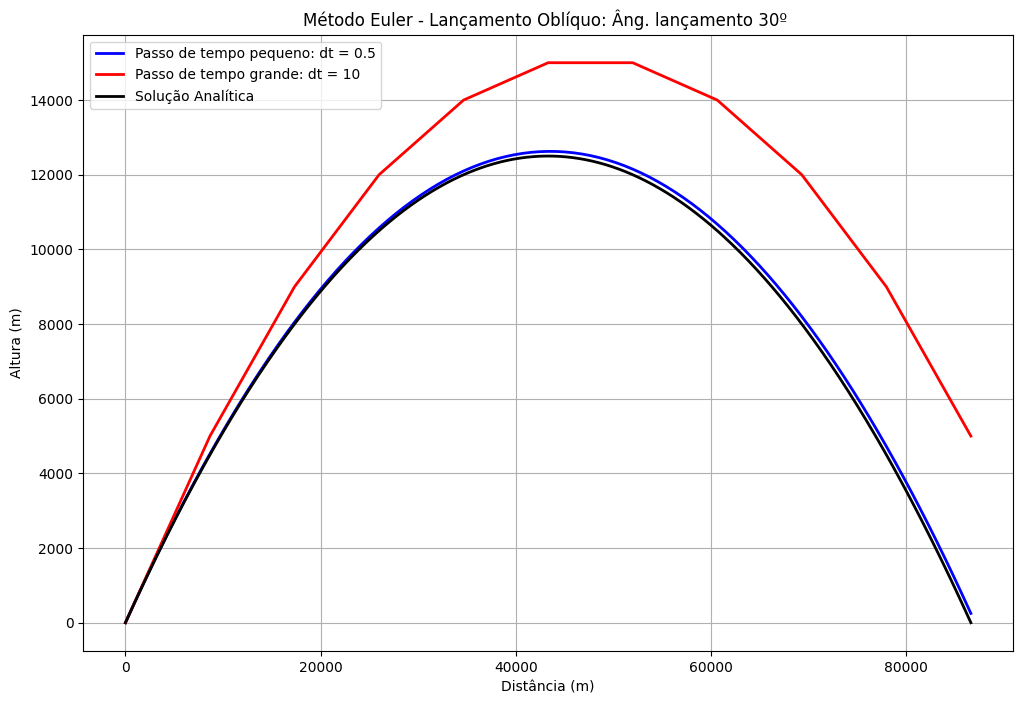

In [4]:
# Calculando Lançamento Oblíquo para Ângulo 30º e v0 = 1000 m/s
x1, y1 = euler_sem_atrito(100000,0.5,1000,30)
x2, y2 = euler_sem_atrito(100000,10,1000,30)
x3, y3 = lançamento_projetil_SemAtrito_analítico(1000,30)

# Plot de linha simples usando Matplotlib
plt.figure(figsize=(12, 8))
plt.plot(x1,y1,linewidth=2, c='blue',label="Passo de tempo pequeno: dt = 0.5")
plt.plot(x2,y2,c='r',linewidth=2, label="Passo de tempo grande: dt = 10")
plt.plot(x3,y3,c='black',linewidth=2, label="Solução Analítica")
plt.xlabel('Distância (m)'); plt.ylabel('Altura (m)')
plt.title('Método Euler - Lançamento Oblíquo: Âng. lançamento 30º ')
plt.legend(fontsize = 10); plt.grid(True); plt.show()

# Questão 2

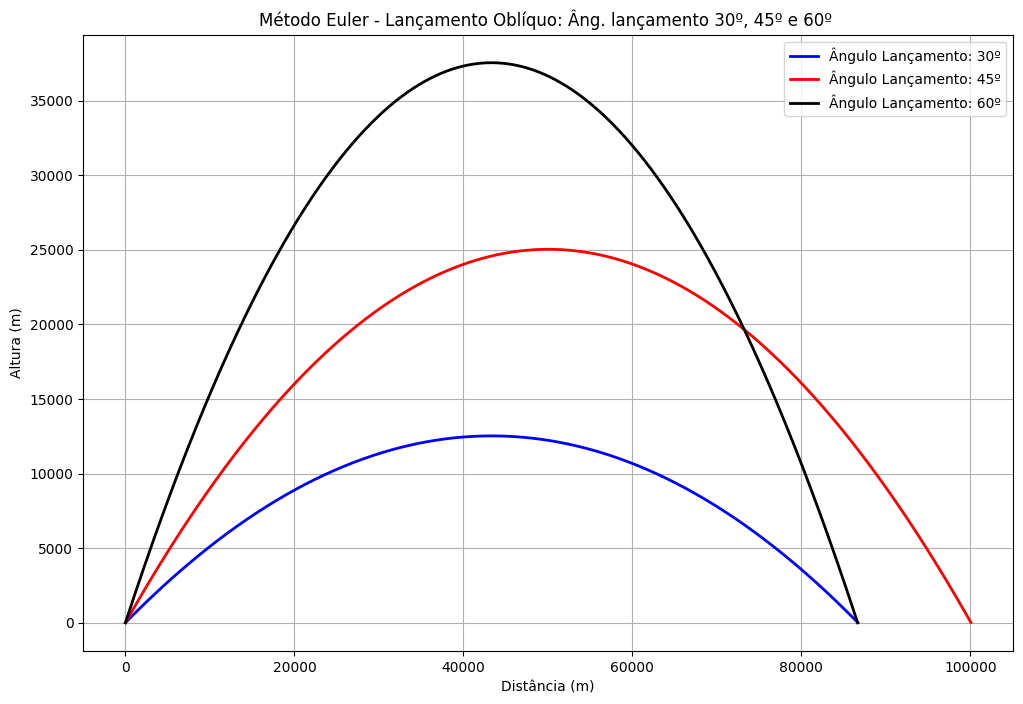

In [5]:
# Calculando Lançamento Oblíquo para Ângulo 30º e v0 = 1000 m/s
x1, y1 = euler_sem_atrito(100000,0.1,1000,30)
x2, y2 = euler_sem_atrito(100000,0.1,1000,45)
x3, y3 = euler_sem_atrito(100000,0.1,1000,60)

# Plot de linha simples usando Matplotlib
plt.figure(figsize=(12, 8))
plt.plot(x1,y1,linewidth=2, c='blue',label="Ângulo Lançamento: 30º")
plt.plot(x2,y2,c='r',linewidth=2, label="Ângulo Lançamento: 45º")
plt.plot(x3,y3,c='black',linewidth=2, label="Ângulo Lançamento: 60º")
plt.xlabel('Distância (m)'); plt.ylabel('Altura (m)')
plt.title('Método Euler - Lançamento Oblíquo: Âng. lançamento 30º, 45º e 60º ')
plt.legend(fontsize = 10); plt.grid(True); plt.show()

# Questão 3

### Definindo Função:   COM Atrito - Método Euler

In [6]:
def euler_com_atrito(np,dt,v0,angulo,gama,m):

    # b = gama/massa ; onde gama é o coeficiente de arrasto

    # Input de dados (Condições Iniciais):
    g = 10; alpha = rad(angulo); b = gama/m
    vx0 = v0*cos(alpha); vy0 = v0*sin(alpha); x0 = 0; y0 = 0;
    x_list = []; y_list = []

    # Método de Euler para resolver Eq. Lançamento Horizontal
    for i in range(0,np):
        x_list.append(x0); y_list.append(y0)

#         vx = vx0 - b*vx0*dt
#         vy = vy0 - b*(vy0 + g/b)*dt
#         x = x0 + vx*dt
#         y = y0 + vy*dt

        vx,vy = vx0 - b*vx0*dt, vy0 - b*(vy0 + g/b)*dt
        x,y = x0 + vx*dt, y0 + vy*dt

        vx0 = vx; vy0 = vy; x0 = x; y0 = y

        if(y <= 0 and i!=0): break

    return x_list,y_list

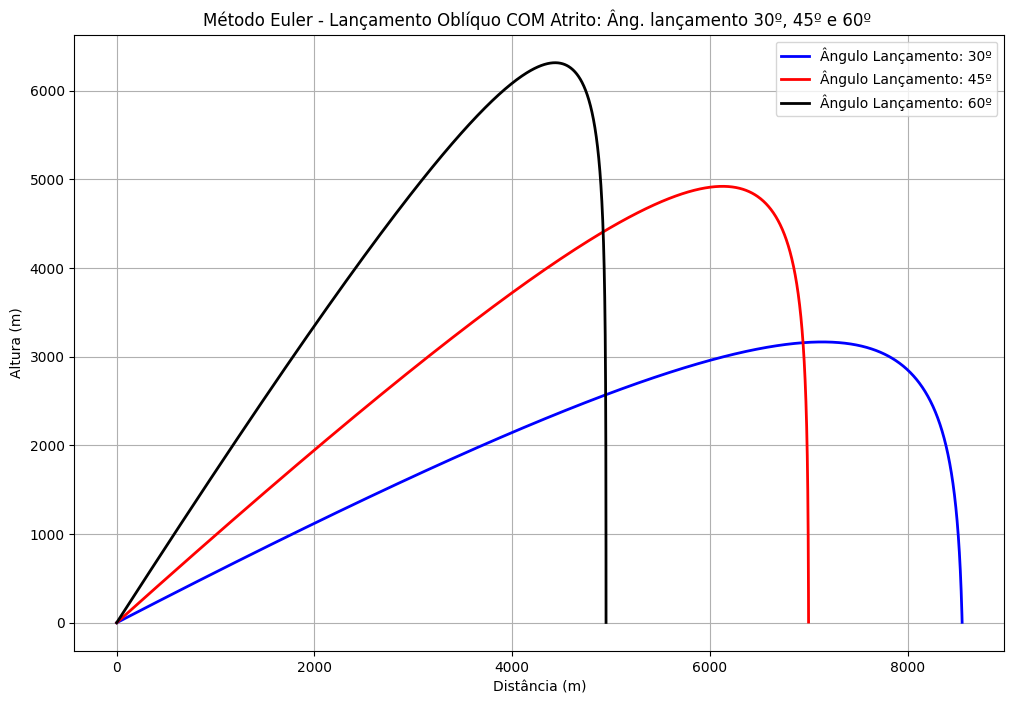

In [7]:
# Calculando Lançamento Oblíquo COM Arrasto para Ângulo 30º
x1,y1 = euler_com_atrito(100000,0.1,1000,30,0.5,5)
x2,y2 = euler_com_atrito(100000,0.1,1000,45,0.5,5)
x3,y3 = euler_com_atrito(100000,0.1,1000,60,0.5,5)

# Plot de linha usando Matplotlib
plt.figure(figsize=(12, 8))
plt.plot(x1,y1,linewidth=2, c='blue',label="Ângulo Lançamento: 30º")
plt.plot(x2,y2,c='r',linewidth=2, label="Ângulo Lançamento: 45º")
plt.plot(x3,y3,c='black',linewidth=2, label="Ângulo Lançamento: 60º")
plt.xlabel('Distância (m)'); plt.ylabel('Altura (m)')
plt.title('Método Euler - Lançamento Oblíquo COM Atrito: Âng. lançamento 30º, 45º e 60º ')
plt.legend(fontsize = 10); plt.grid(True); plt.show()

.

.

.

## Acaba aqui o gabarito do Trabalho 1.


--> Próximas linhas de códigos é para apresentar uma biblioteca mais recente de python e que alguns ainda podem não conhecer.

--> Além de apresentar também algumas funcionalidades de "Widgets" (adicionar botões em códigos e gráficos em python) que são muito úteis tanto para questões de apresentação de dados, quanto para aumentar a dinâmica de interação dos inputs com os resultados gráficos (outputs).


(Vou mostrar só algumas funcionalidades mesmo, com caráter introdutório --> qualquer coisa me envia um email que posso mostrar algumas funções mais complexas, como por exemplo gerar site automático dos gráficos feitos em python)

email para contato: leo.c.rossato@gmail.com

.





## --------------------------------------------------------------------------------------------
# Usando biblioteca Plotly e alguns Widgets
## --------------------------------------------------------------------------------------------




### Usando pacote "Express" do plotly

--> Precisa usar biblioteca Pandas para gerar dataframes e com isso criar os gráficos

--> é bem mais simples de usar (se você está acostumado com o Pandas)

site para referência: https://plotly.com/python/plotly-express/#overview

####  Para baixar a biblioteca é só rodar o seguinte código:

* `no terminal do linux:`     pip install pip install plotly==5.14.1

* `em alguma cédula do jupyter ou do colab (isso vale pro windows tbm):`  !pip install plotly==5.14.1

para versão mais recente entre no site: https://plotly.com/python/getting-started/

In [8]:
import plotly.express as px  #Biblioteca Gráfica Plotly
import pandas as pd  #Biblioteca de análise de dados --> usando "dataframes"

In [9]:
# Calculando Lançamento Oblíquo COM Arrasto para Ângulo 30º , 45º e 60º
# Atente que foi usado o mesmo valor de "x" --> x1=x2=x3

# Redefini a função para ter um passo maior (eaí o dataframe n fica tão grande e pesado)
def lançamento_projetil_SemAtrito_analítico(v0,angulo):
    g = 10; y = 0; x=0; alpha = rad(angulo)
    x_list = []; y_list = [];

    while y>=0:
        y_list.append(y); x_list.append(x)
        y += (tan(alpha) - (g/((v0**2)*(cos(alpha)**2)))*x)
        x += 100

    return x_list,y_list

x1,y1 = lançamento_projetil_SemAtrito_analítico(1000,30)
x2,y2 = lançamento_projetil_SemAtrito_analítico(1000,45)
x3,y3 = lançamento_projetil_SemAtrito_analítico(1000,60)

# Igualando tamanho das listas
oqfalta = len(y2) - len(y1)
for i in range(oqfalta):
    y1.append(0); y3.append(0)

# Criando Dataframe com Pandas
df = pd.DataFrame()
df['x'] = x2; df['y1'] = np.array(y1); df['y2'] = np.array(y2); df['y3'] = np.array(y3);

# Mostrando na tela o dataframe criado
display(df)

# Plot dos dados usando Plotly Express
fig = px.line(df,x='x',y=['y1','y2','y3'], markers=False,template='gridon',
             labels={'x': 'Distância (m)', 'value': 'Altitude (m)'})

fig.update_layout(title={
    'text' : 'Lançamento Projétil: 30º, 45º e 60º --> Usando Plotly.Express',
    'y': 0.95,
    'x': 0.5
})

fig. show()

,x,y1,y2,y3
0,0,0.000000,0.000000e+00,0.000000
1,100,0.577350,1.000000e+00,1.732051
2,200,1.153367,1.998000e+00,3.460102
3,300,1.728051,2.994000e+00,5.184152
4,400,2.301401,3.988000e+00,6.904203
...,...,...,...,...
997,99700,0.000000,3.988000e+00,0.000000
998,99800,0.000000,2.994000e+00,0.000000
999,99900,0.000000,1.998000e+00,0.000000
1000,100000,0.000000,1.000000e+00,0.000000


### Usando pacote "go" do plotly

--> Não precisa usar de dataframes para gerar gráficos (add nova linha de plot semelhante ao matplotlib)

--> tem mais opções de layout dos gráficos (mas é mais chatinha de configurar)

site para referência: https://medium.com/@eduardocorreaaraujo8/gr%C3%A1fico-de-linhas-no-plotly-em-python-1eafd35ca73a

In [10]:
import plotly.graph_objects as go

In [11]:
# Calculando Lançamento Oblíquo COM Arrasto para Ângulo 30º, 45º e 60º
x1,y1 = euler_com_atrito(100000,0.1,1000,30,0.5,5)
x2,y2 = euler_com_atrito(100000,0.1,1000,45,0.5,5)
x3,y3 = euler_com_atrito(100000,0.1,1000,60,0.5,5)

# cria a figura que será plotada
fig = go.Figure()

# o comando fig_add_trace, adiciona o gráfico na imagem
# nesse caso estamos utilizando o go.Scatter para geral o gráfico.
fig.add_trace(go.Scatter(x = x1, y = y1))
fig.add_trace(go.Scatter(x = x2, y = y2))
fig.add_trace(go.Scatter(x = x3, y = y3))

# o comando fig.update_layout nos permite alterar o layout do gráfico,
# nesse caso vamos adicionar os títulos do gráfico e dos textos

fig.update_layout(title='Plot usando pacote "go" do plotly (tem mais funcionalidades)',
                  xaxis_title='Distância (m)', yaxis_title='Altura (m)')
fig.show() #mostra o gráfico

# Usando alguns widgets

####  Para baixar a biblioteca é só rodar o seguinte código:

* `no terminal do linux:`     pip install pip install ipywidgets

* `em alguma cédula do jupyter ou do colab (isso vale pro windows tbm):`  !pip install ipywidgets

para mais info sobre a biblioteca: https://ipywidgets.readthedocs.io/en/stable/

In [12]:
import ipywidgets as widgets
from ipywidgets import interact

In [13]:
x = 451; y = 455
display(df[x:y])

,x,y1,y2,y3
451,45100,125.084971,248.050,375.254914
452,45200,125.060988,248.148,375.182965
453,45300,125.035672,248.244,375.107016
454,45400,125.009022,248.338,375.027067


In [14]:
df.shape[0]

1002

In [15]:
# Printando de forma interativa o Dataframe gerado anteriormente p/o plotly

@interact
def tabela_interativa( x=(0,df.shape[0],100), y=(2,df.shape[0],1)):
    return display(df[x:y])

interactive(children=(IntSlider(value=500, description='x', max=1002, step=100), IntSlider(value=502, descript…

In [19]:
def plota_questão3(dt=(0.01,10,0.1),v0=(1,10000,10),gama=(0.001,100,1),m=(0.001,1000,1),
                   ang1=(0,45,1),ang2=(10,80,1),ang3=(45,90,1),
                   background_gráfico = ['ggplot2', 'seaborn', 'simple_white', 'plotly',
                                         'plotly_white', 'plotly_dark', 'presentation',
                                         'xgridoff','ygridoff', 'gridon', 'none']
                  ):

    # Calculando Lançamento Oblíquo COM Arrasto para Ângulo 30º, 45º e 60º
    x1,y1 = euler_com_atrito(100000,dt,v0,ang1,gama,m)
    x2,y2 = euler_com_atrito(100000,dt,v0,ang2,gama,m)
    x3,y3 = euler_com_atrito(100000,dt,v0,ang3,gama,m)

    # cria a figura que será plotada
    fig = go.Figure()

    # o comando fig_add_trace, adiciona o gráfico na imagem
    # nesse caso estamos utilizando o go.Scatter para geral o gráfico.
    fig.add_trace(go.Scatter(x = x1, y = y1,name = 'Ângulo de Lançamento: '+str(ang1)+'º', mode = 'lines'))
    fig.add_trace(go.Scatter(x = x2, y = y2,name = 'Ângulo de Lançamento: '+str(ang2)+'º', mode = 'lines'))
    fig.add_trace(go.Scatter(x = x3, y = y3,name = 'Ângulo de Lançamento: '+str(ang3)+'º', mode = 'lines'))

    # o comando fig.update_layout nos permite alterar o layout do gráfico,
    # nesse caso vamos adicionar os títulos do gráfico e dos textos

    fig.update_layout(title='Plot usando pacote "go" do plotly --> Com controles / widgets',
                      xaxis_title='Distância (m)', yaxis_title='Altura (m)',
                      template = background_gráfico)
    fig.show() #mostra o gráfico

In [20]:
# Printando de forma interativa o gráfico da questão 3 (usando plotly.go e widgets)
interact(plota_questão3)

interactive(children=(FloatSlider(value=4.91, description='dt', max=10.0, min=0.01), IntSlider(value=4991, des…

<function __main__.plota_questão3(dt=(0.01, 10, 0.1), v0=(1, 10000, 10), gama=(0.001, 100, 1), m=(0.001, 1000, 1), ang1=(0, 45, 1), ang2=(10, 80, 1), ang3=(45, 90, 1), background_gráfico=['ggplot2', 'seaborn', 'simple_white', 'plotly', 'plotly_white', 'plotly_dark', 'presentation', 'xgridoff', 'ygridoff', 'gridon', 'none'])>